## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
merged_df.head(30)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
total_mice = merged_df["Mouse ID"].nunique()
total_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_id = merged_df.loc[merged_df.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
optional_df = merged_df.loc[merged_df["Mouse ID"]=="g989"]
optional_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.loc[merged_df["Mouse ID"]!="g989"]
clean_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
total_mice = clean_df["Mouse ID"].nunique()
total_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean_data = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median_data = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance_data = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std_data = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem_data = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

stats_df = pd.DataFrame({"Mean":mean_data,
                         "Median":median_data,
                         "Variance":variance_data,
                         "STD":std_data,
                         "SEM":sem_data})
stats_df



,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df2 = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
# Using the aggregation method, produce the same summary statistics in a single line
summary_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

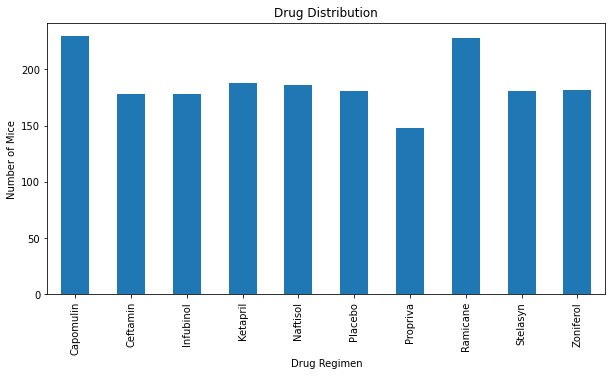

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
bar_plot = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
bar_plot.plot(kind="bar", figsize=(10,5))
plt.title("Drug Distribution")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()
plt.tight_layout()




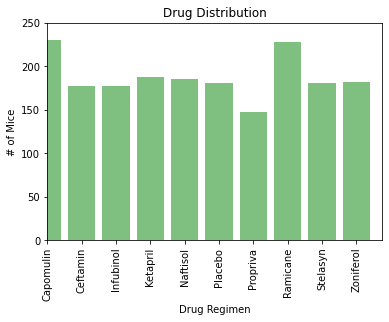

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
bar_plot

x_axis= np.arange(0, len(bar_plot))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Drug Distribution")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice")

plt.xlim(0, len(bar_plot)-0.25)
plt.ylim(0, max(bar_plot)+20)

plt.bar(x_axis, bar_plot, facecolor="g", alpha=0.5, align="center")
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation = "vertical")

plt.show()


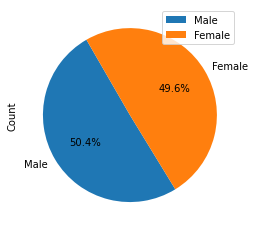

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
males = clean_df[clean_df["Sex"]== "Male"]["Mouse ID"].nunique()
females = clean_df[clean_df["Sex"]== "Female"]["Mouse ID"].nunique()

gender_df = pd.DataFrame({"Sex": ["Male", "Female"], "Count": [males, females]})
gender_df_index = gender_df.set_index("Sex")

plot = gender_df_index.plot(kind="pie", y="Count", autopct="%1.1f%%", startangle=120)
plot


(-1.1095079780578545,
 1.1237589308470166,
 -1.1098305181581762,
 1.1216264710261226)

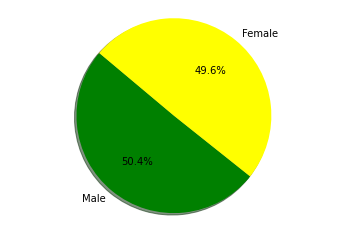

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyp
labels = ["Male", "Female"]
sizes = ["125", "123"]
colors = ["Green", "Yellow"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")




## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

filt_cap = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
filt_ram = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane"]
filt_infu = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol"]
filt_ceft = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_cap = filt_cap.groupby("Mouse ID")["Timepoint"].max()
last_timepoint_ram = filt_ram.groupby("Mouse ID")["Timepoint"].max()
last_timepoint_infu = filt_infu.groupby("Mouse ID")["Timepoint"].max()
last_timepoint_ceft = filt_ceft.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
fin_vol_cap = pd.DataFrame(last_timepoint_cap)
cap_merge = pd.merge(fin_vol_cap, clean_df, on = ("Mouse ID", "Timepoint"), how = "left")

fin_vol_ram = pd.DataFrame(last_timepoint_ram)
ram_merge = pd.merge(fin_vol_ram, clean_df, on = ("Mouse ID", "Timepoint"), how = "left")

fin_vol_infu = pd.DataFrame(last_timepoint_infu)
infu_merge = pd.merge(fin_vol_infu, clean_df, on = ("Mouse ID", "Timepoint"), how = "left")

fin_vol_ceft = pd.DataFrame(last_timepoint_ceft)
ceft_merge = pd.merge(fin_vol_ceft, clean_df, on = ("Mouse ID", "Timepoint"), how = "left")


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = [cap_merge, ram_merge, infu_merge, ceft_merge]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data_plot = []

for treatment in treatments:
    print(treatment)

   Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0      b128         45    Capomulin  Female           9          22   
1      b742         45    Capomulin    Male           7          21   
2      f966         20    Capomulin    Male          16          17   
3      g288         45    Capomulin    Male           3          19   
4      g316         45    Capomulin  Female          22          22   
5      i557         45    Capomulin  Female           1          24   
6      i738         45    Capomulin  Female          23          20   
7      j119         45    Capomulin  Female           7          23   
8      j246         35    Capomulin  Female          21          21   
9      l509         45    Capomulin    Male          17          21   
10     l897         45    Capomulin    Male          17          19   
11     m601         45    Capomulin    Male          22          17   
12     m957         45    Capomulin  Female           3          19   
13    

In [15]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds

#Capomulin
cap_list = cap_merge["Tumor Volume (mm3)"]
quartiles = cap_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

tumor_volume_data_plot.append(cap_list) 

print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")
print (f"Capomulin IQR is {iqr}.")

#Ramicane
ram_list = ram_merge["Tumor Volume (mm3)"]
quartiles = ram_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

tumor_volume_data_plot.append(ram_list) 

print(f"Ramicane potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")
print (f"Ramicane IQR is {iqr}.")

#Infubinol
infu_list = infu_merge["Tumor Volume (mm3)"]
quartiles = infu_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

tumor_volume_data_plot.append(infu_list) 

print(f"Infubinol potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")
print (f"Infubinol IQR is {iqr}.")

#Ceftamin
ceft_list = ceft_merge["Tumor Volume (mm3)"]
quartiles = ceft_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

tumor_volume_data_plot.append(ceft_list) 

print(f"Ceftamin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")
print (f"Ceftamin IQR is {iqr}.")

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.
Capomulin IQR is 7.781863460000004.
Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.
Ramicane IQR is 9.098536719999998.
Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.
Infubinol IQR is 11.477135160000003.
Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.
Ceftamin IQR is 15.577752179999997.


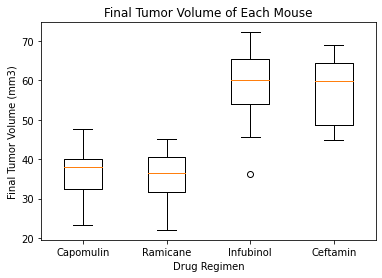

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_volume_data_plot

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Each Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(tumor_volume_data_plot, labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

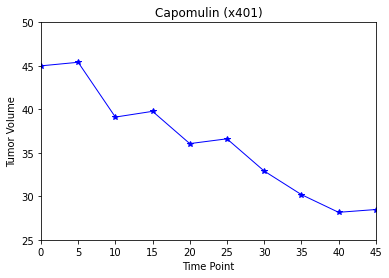

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis = np.arange(0,46,5)
tumor_vol = [45, 45.41, 39.11, 39.77, 36.06, 36.61, 32.91, 30.20, 28.16, 28.48]

plt.xlabel("Time Point")
plt.ylabel("Tumor Volume")
plt.title("Capomulin (x401)")
plt.ylim(25, 50)
plt.xlim(0, 45)

tumor_line, = plt.plot(x_axis, tumor_vol, marker="*", color="blue", linewidth=1, label="Capomulin")
plt.show()



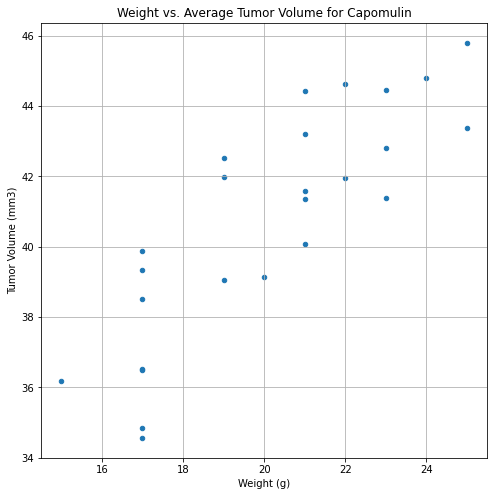

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
drug_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

weight_tumor = drug_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

avg_tumor_volume = pd.DataFrame(weight_tumor.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()

avg_tumor_volume = avg_tumor_volume.set_index("Mouse ID")

avg_tumor_volume.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(8,8), title="Weight vs. Average Tumor Volume for Capomulin")


plt.show()





















## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mouse_weight = avg_tumor_volume.iloc[:,0]
tumor_volume = avg_tumor_volume.iloc[:,1]
correlation = st.pearsonr(mouse_weight,tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")




The correlation between both factors is 0.84


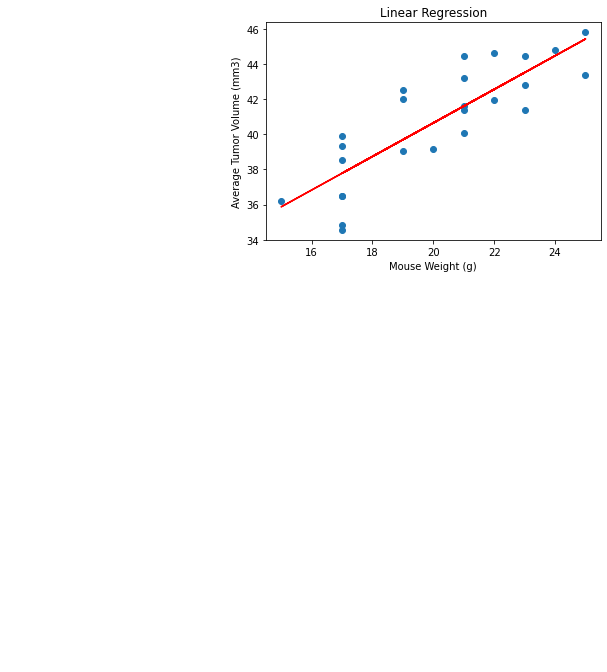

In [20]:
x_values = avg_tumor_volume['Weight (g)']
y_values = avg_tumor_volume['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Linear Regression')
plt.show()
